In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/Heart disease prediction dataset/heart.csv')

In [7]:
df.sample(5)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1


In [5]:
# New imports 
import matplotlib.colors as colors

In [6]:
df = df.rename(columns={'trestbps': 'restbp'})

## Column Names Full forms

* Age 
* Sex
* cp - Chest Pain
* restbp - Resting Blood Pressure
* chol - serum cholestrol
* fbs - fasting blood sugar
* restecg - restecg
* thalach - max heartrate achieved
* exang - excercise induced angina
* oldpeak - ST depression induced by excercise relative to rest
* slope - slope of peak excercise ST segment
* ca - no. of major vessels coloured by flouroscopy
* thal - thalium heart scan 
* target - diagnosis of heart disease

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  target   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

* The data is completely clean and has no null values 

In [13]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dividing the data into Dependent and Independent variables

In [62]:
x = df.drop(columns=['target']).copy()
y = df['target'].copy()

* One hot encoding is required for cp,restecg,slope,ca,thal

In [69]:
x_en = pd.get_dummies(x,columns=['cp','restecg','slope','ca','thal'])

### Dividing into training and testing sets 

In [70]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test = tts(x_en,y,test_size=0.4,random_state=23)

* The radial basis function we are using along with the support vector machine assumes data is centered and scaled 
* So we need to do this for both training and testing sets
* We split the data and then scale to avoid data leakage 
* Data leakage - info in training data corrupts or influences testing data

In [71]:
from sklearn.preprocessing import scale
x_train_s = scale(x_train)
x_test_s  = scale(x_test)

### Building a preliminary Support Vector Classifier

In [87]:
from sklearn.svm import SVC
svc = SVC(random_state=344)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [88]:
score = svc.score(x_test,y_test)
score

0.7213114754098361

### Plotting a Confusion Matrix

In [94]:
def confusion(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

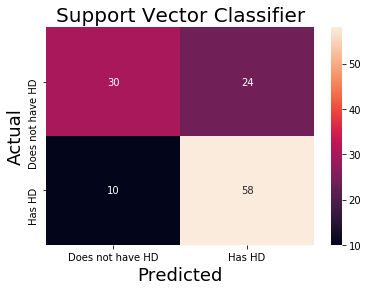

In [96]:
confusion(y_test, y_pred, ['Does not have HD', 'Has HD'], title='Support Vector Classifier')

### Optimizing SVC with Cross Validation

In [98]:
# making a parameters grid
param_grid = [{'C':[1,10,100,1000],
               'gamma':[0.001,0.0001],
              'kernel':['rbf']}] #radial basis function

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(SVC(),param_grid,cv=10,verbose=0)
optimal_params.fit(x_train_s,y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

### Sub the parameters for SVC

In [103]:
svc = SVC(random_state=334,C=10,gamma=0.0001,kernel='rbf')
svc.fit(x_train_s,y_train)
y_pred = svc.predict(x_test)
score = svc.score(x_test,y_test)
score

0.5573770491803278

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_s,y_train)
score = rfc.score(x_test,y_test)
score

0.8278688524590164